In [9]:
import pandas as pd
import matplotlib.pyplot as plt

from ds_planner.short_term_forecasting_models import Model
from ds_planner.time_series import DartsTimeSeries
from ds_planner.data import get_available_datasets, load_dataset

### Check some example data

In [2]:
get_available_datasets()

{'example_hourly_data': {'description': 'Example dataset: example_hourly_data',
  'format': 'csv'},
 'example_weather': {'description': 'Example dataset: example_weather',
  'format': 'csv'}}

In [3]:
df = load_dataset('example_hourly_data')
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.set_index('datetime')

df.columns

Index(['T_out', 'RH_out', 'Wind_speed_m_per_s', 'Wind_direction_deg',
       'Diffuse_Solar_W_per_m2', 'Direct_Solar_W_per_m2', 'Electricity_kWh',
       'NaturalGas_kWh'],
      dtype='object')

### Create a time series object

<Axes: xlabel='datetime'>

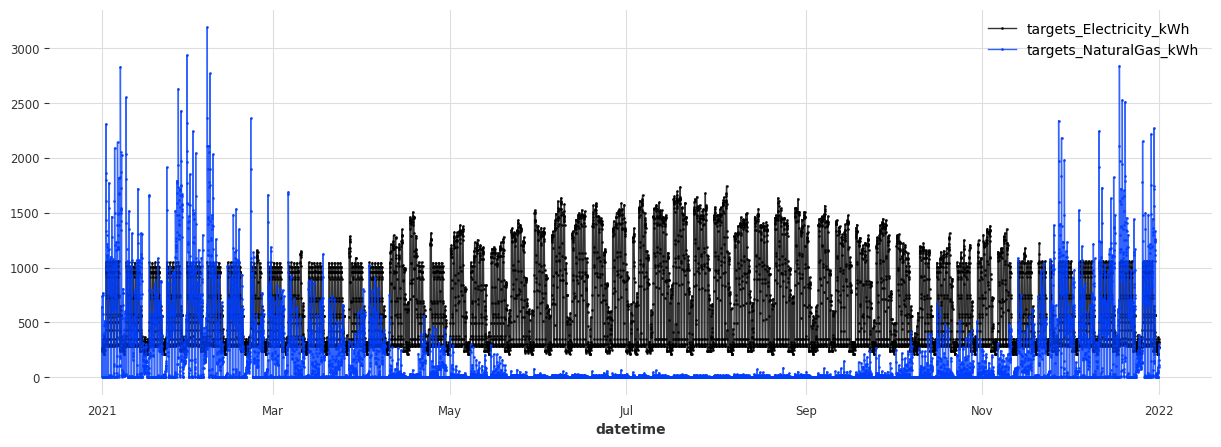

In [4]:
target_cols = ['Electricity_kWh', 'NaturalGas_kWh']
past_cov_cols = ['T_out', 'RH_out', 'Wind_speed_m_per_s', 'Wind_direction_deg', 'Diffuse_Solar_W_per_m2', 'Direct_Solar_W_per_m2']
dts = DartsTimeSeries(df, freq='h', target_cols=target_cols, past_cov_cols=past_cov_cols)

f, ax = plt.subplots(1, 1, figsize=(15, 5))
dts.targets.plot(ax=ax, label='targets', alpha=0.8, linewidth=1, marker='o', markersize=1)


### Try the weather sensitivity analysis

In [5]:
from ds_planner.weather_sensitivity_models import ChangePointModel

(<Figure size 1000x400 with 1 Axes>,
 <Axes: title={'center': 'Raw Data: Temperature vs Natural Gas (kWh) (8760 points); no model fitted yet'}, xlabel='Temperature (°C)', ylabel='Natural Gas (kWh)'>)

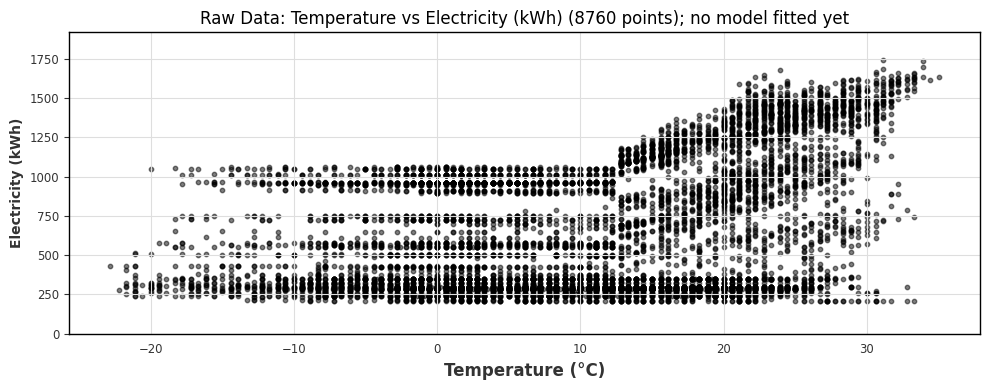

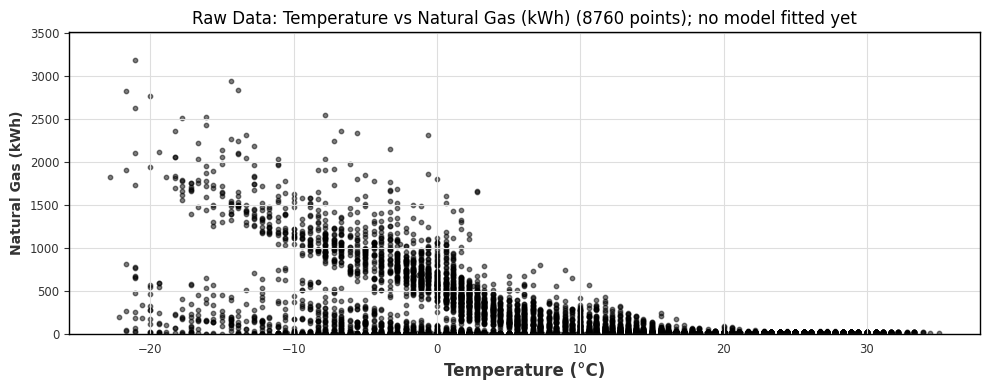

In [6]:
cp_model_hourly_e = ChangePointModel(temperature=df['T_out'], y=df['Electricity_kWh'], y_var_name='Electricity (kWh)')
cp_model_hourly_n = ChangePointModel(temperature=df['T_out'], y=df['NaturalGas_kWh'], y_var_name='Natural Gas (kWh)')

# Plot the raw data
cp_model_hourly_e.plot_model()
cp_model_hourly_n.plot_model()

(<Figure size 1000x400 with 1 Axes>,
 <Axes: title={'center': 'Change-point model for Natural Gas (kWh) (12 points)'}, xlabel='Temperature (°C)', ylabel='Natural Gas (kWh)'>)

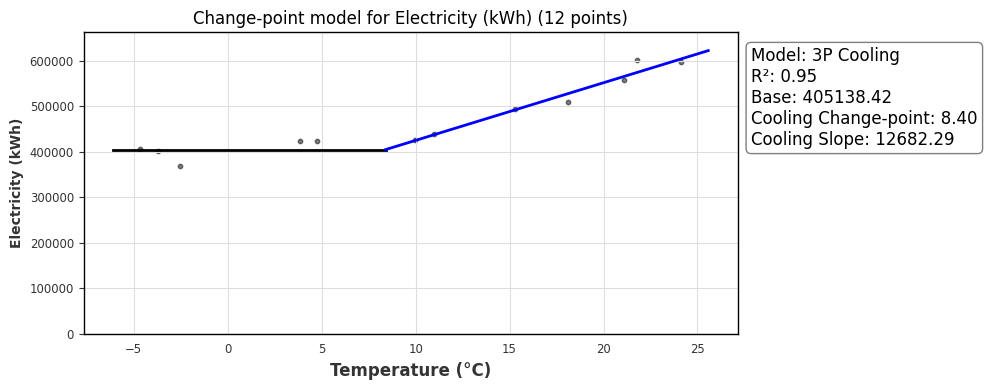

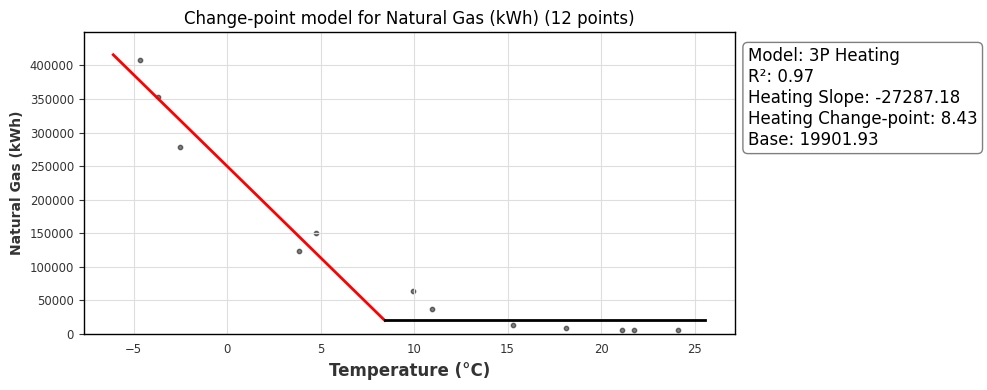

In [10]:
# The scatters are too sparse, try resampling the data to monthly with these rules:
# T_out, RH_out, Wind_speed_m_per_s, Wind_direction_deg, Diffuse_Solar_W_per_m2, Direct_Solar_W_per_m2: mean
# Electricity_kWh, NaturalGas_kWh: sum
df_monthly = df.resample('ME').agg({
    'T_out': 'mean', 
    'RH_out': 'mean', 
    'Wind_speed_m_per_s': 'mean', 
    'Wind_direction_deg': 'mean', 
    'Diffuse_Solar_W_per_m2': 'mean', 
    'Direct_Solar_W_per_m2': 'mean', 
    'Electricity_kWh': 'sum', 
    'NaturalGas_kWh': 'sum'
})


cp_model_monthly_e = ChangePointModel(temperature=df_monthly['T_out'], y=df_monthly['Electricity_kWh'], y_var_name='Electricity (kWh)')
cp_model_monthly_n = ChangePointModel(temperature=df_monthly['T_out'], y=df_monthly['NaturalGas_kWh'], y_var_name='Natural Gas (kWh)')

# Plot the raw data
cp_model_monthly_e.fit_model()
cp_model_monthly_n.fit_model()

cp_model_monthly_e.plot_model()
cp_model_monthly_n.plot_model()